<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates the use of gradient descent to find a local minimum of the Himmelblau's function, which is a classic example of a non-convex optimization problem.

1. Himmelblau's Function:

The Himmelblau's function is defined as:

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

This function has four local minima.

2. Gradient of Himmelblau's Function:

The gradient of the Himmelblau's function is a vector of its partial derivatives with respect to x and y:

$$∇f(x, y) = \begin{bmatrix} \frac{∂f}{∂x} \\ \frac{∂f}{∂y} \end{bmatrix} = \begin{bmatrix} 4x(x^2 + y - 11) + 2(x + y^2 - 7) \\ 2(x^2 + y - 11) + 4y(x + y^2 - 7) \end{bmatrix}$$

The code calculates this gradient in the himmelblau_gradient function.

3. Gradient Descent Algorithm:

Gradient descent is an iterative optimization algorithm that aims to find a local minimum of a function. It works by repeatedly taking steps in the opposite direction of the gradient. The update rule for gradient descent is:

$$x_{t+1} = x_t - α∇f(x_t)$$

where:

$x_t$ is the current point at iteration t.
$α$ is the learning rate, which controls the step size.
$∇f(x_t)$ is the gradient of the function at the current point.
The code implements this algorithm in the gradient_descent function.

4. Visualization:

The code uses matplotlib to visualize the optimization process:

It plots the contour lines of the Himmelblau's function, which represent points of equal function value.
It plots the optimization path, showing how the algorithm moves from the starting point to the final point.
It marks the start and end points with different colors.
In essence, the code performs the following steps:

Defines the Himmelblau's function and its gradient.
Implements the gradient descent algorithm.
Sets the starting point, learning rate, and number of iterations.
Runs the gradient descent algorithm to find a local minimum.
Visualizes the results.

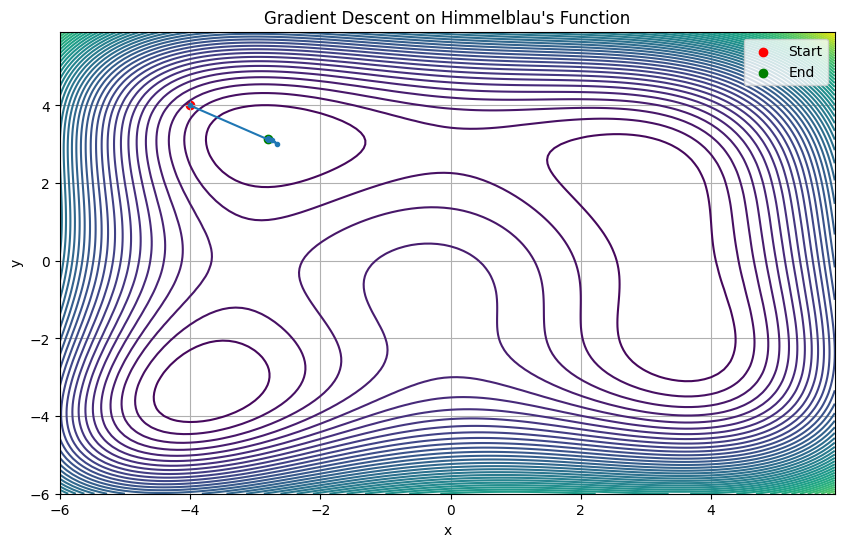

Final Point: [-2.80511809  3.13131252]
Himmelblau's value at final point: 7.888609052210118e-31


In [ ]:
# Use gradient descent to optimize non-convex optimization problems

import numpy as np
import matplotlib.pyplot as plt

# Define the Himmelblau's function (a non-convex function)
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of Himmelblau's function
def himmelblau_gradient(x):
    grad = np.zeros(2)
    grad[0] = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    grad[1] = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return grad

# Gradient Descent
def gradient_descent(start_point, learning_rate, iterations):
    x = np.array(start_point, dtype=float)
    history = [x.copy()]  # Store the optimization path
    for i in range(iterations):
        grad = himmelblau_gradient(x)
        x -= learning_rate * grad
        history.append(x.copy())
    return np.array(history)

# Parameters
start_point = [-4, 4] # Initial point
learning_rate = 0.01
iterations = 500

# Run Gradient Descent
optimization_path = gradient_descent(start_point, learning_rate, iterations)

# Plot the results
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, 50)  # Plot contours of the Himmelblau function
plt.plot(optimization_path[:, 0], optimization_path[:, 1], marker='o', markersize=3, linestyle='-')
plt.scatter(optimization_path[0, 0], optimization_path[0, 1], color='red', label='Start')
plt.scatter(optimization_path[-1, 0], optimization_path[-1, 1], color='green', label='End') #Final point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on Himmelblau\'s Function')
plt.legend()
plt.grid(True)
plt.show()


print(f"Final Point: {optimization_path[-1]}")
print(f"Himmelblau's value at final point: {himmelblau(optimization_path[-1])}")

